In [43]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

dataset = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [65]:
# @title  TASK 1 Handle Missing Values and Remove Outliers
# Load the dataset
dataset = yf.download('AAPL')['Adj Close']

# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values
dataset = dataset.interpolate()  # Interpolate missing values

# Detect and remove outliers using z-score method
z_scores = np.abs(stats.zscore(dataset))
threshold = 3  # Adjust  threshold
outliers = np.where(z_scores > threshold)
dataset = dataset.drop(dataset.index[outliers[0]])

# the modified dataset
print("Modified dataset:\n", dataset)

[*********************100%***********************]  1 of 1 completed
Missing values:
 0
Modified dataset:
 Date
1980-12-12      0.099584
1980-12-15      0.094388
1980-12-16      0.087461
1980-12-17      0.089625
1980-12-18      0.092224
                 ...    
2023-01-03    124.706833
2023-01-04    125.993095
2023-01-05    124.656975
2023-01-06    129.243622
2023-01-09    129.772079
Name: Adj Close, Length: 10188, dtype: float64


[*********************100%***********************]  1 of 1 completed


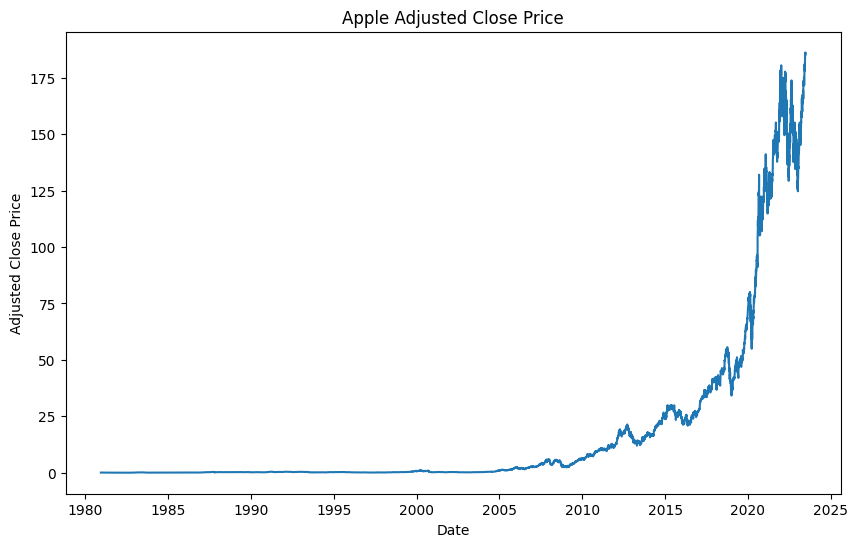

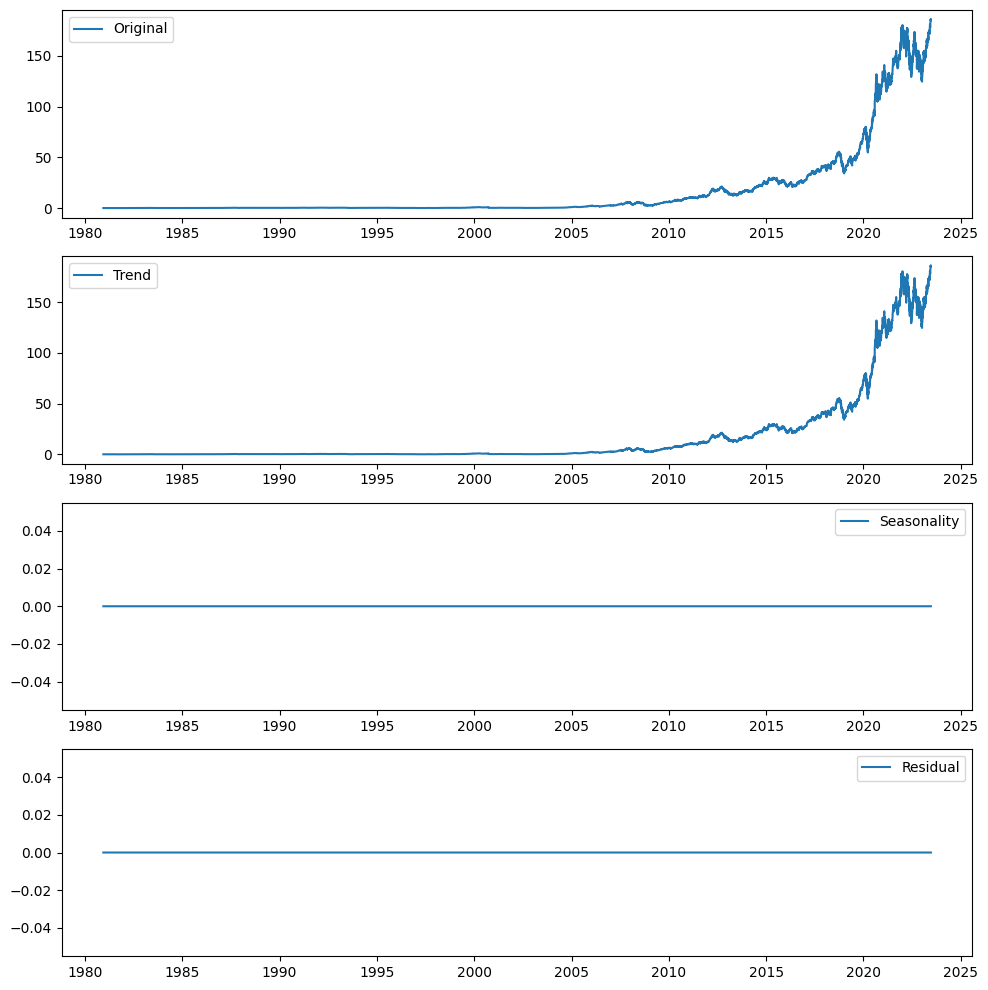

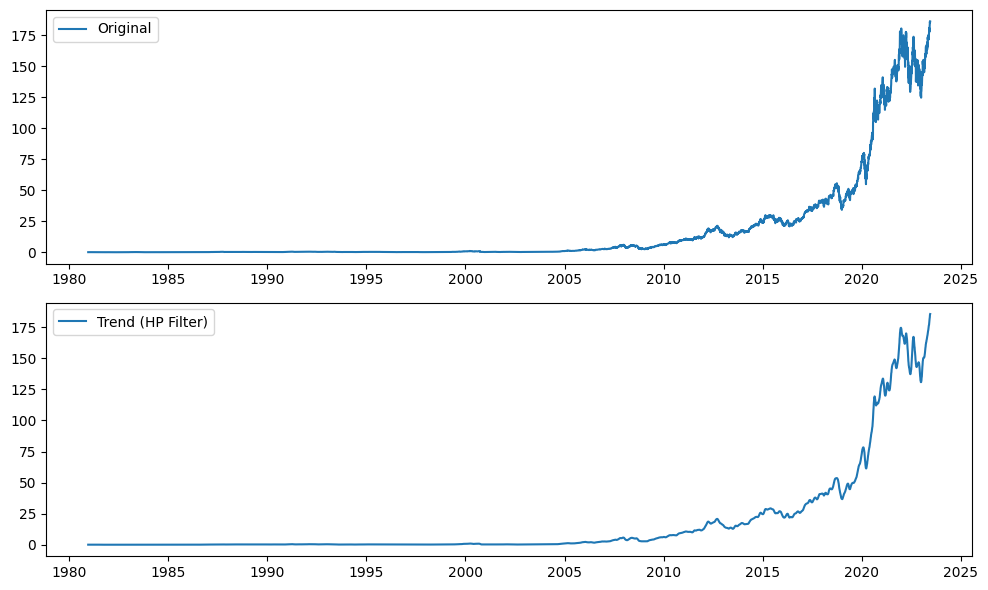

In [45]:
# @title TASK 2 : Decompose the Time Series


dataset = yf.download('AAPL')['Adj Close']

# Convert the index to datetime
dataset.index = pd.to_datetime(dataset.index)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(dataset)
plt.title('Apple Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

# Seasonal decomposition of time series
decomposition = sm.tsa.seasonal_decompose(dataset, model='additive',period=1)
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(dataset, label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# HP filter decomposition
cycle, trend_hp = sm.tsa.filters.hpfilter(dataset)

# Plot the decomposed components using HP filter
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(dataset, label='Original')
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.plot(trend_hp, label='Trend (HP Filter)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Task 3: Check for Stationarity

In [46]:
 #Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

# Fetch AAPL historical stock data from Yahoo Finance
aapl = yf.download('AAPL', start='2010-01-01', end='2023-06-19')

# Extract the adjusted close prices as the time series data
data = aapl['Adj Close']

# Perform the ADF test
result = adfuller(data)

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpret the test results
if p_value < 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')


[*********************100%***********************]  1 of 1 completed
ADF Statistic: 1.1019
p-value: 0.9952
The time series is likely non-stationary.


In [47]:
from statsmodels.tsa.stattools import kpss

# Fetch AAPL historical stock data from Yahoo Finance
aapl = yf.download('AAPL', start='2010-01-01', end='2023-06-19')

# Extract the adjusted close prices as the time series data
data = aapl['Adj Close']

def kpss_test(data):
    print('Results of KPSS Test:')
    kpsstest = kpss(data, regression='c', nlags='auto')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', '#Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)

# Call the function
kpss_test(data)


[*********************100%***********************]  1 of 1 completed
Results of KPSS Test:
Test Statistic            7.181266
p-value                   0.010000
#Lags Used               37.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


test Statistic > Critical Value and p-value < 0.05.
Hence we conclude series is non-stationary

In [48]:
# Perform the ADF test on the residuals
residuals=decomposition.resid
result = adfuller(residuals.dropna())

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpret the test results
if p_value < 0.05:
    print('The residuals are likely stationary.')
else:
    print('The residuals are likely non-stationary.')

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


ADF Statistic: nan
p-value: nan
The residuals are likely non-stationary.


In [49]:
# Perform the KPSS test on the residuals

def kpss_test(residuals):
    print('Results of KPSS Test:')
    kpsstest = kpss(data, regression='c', nlags='auto')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', '#Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)

# Call the function
kpss_test(data)

Results of KPSS Test:
Test Statistic            7.181266
p-value                   0.010000
#Lags Used               37.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Task 4-Make the series stationary

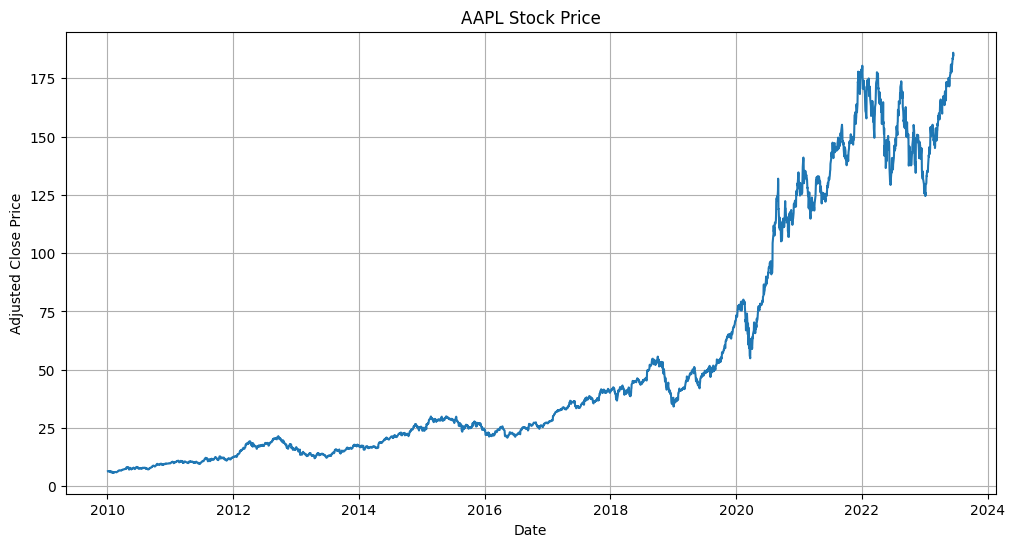

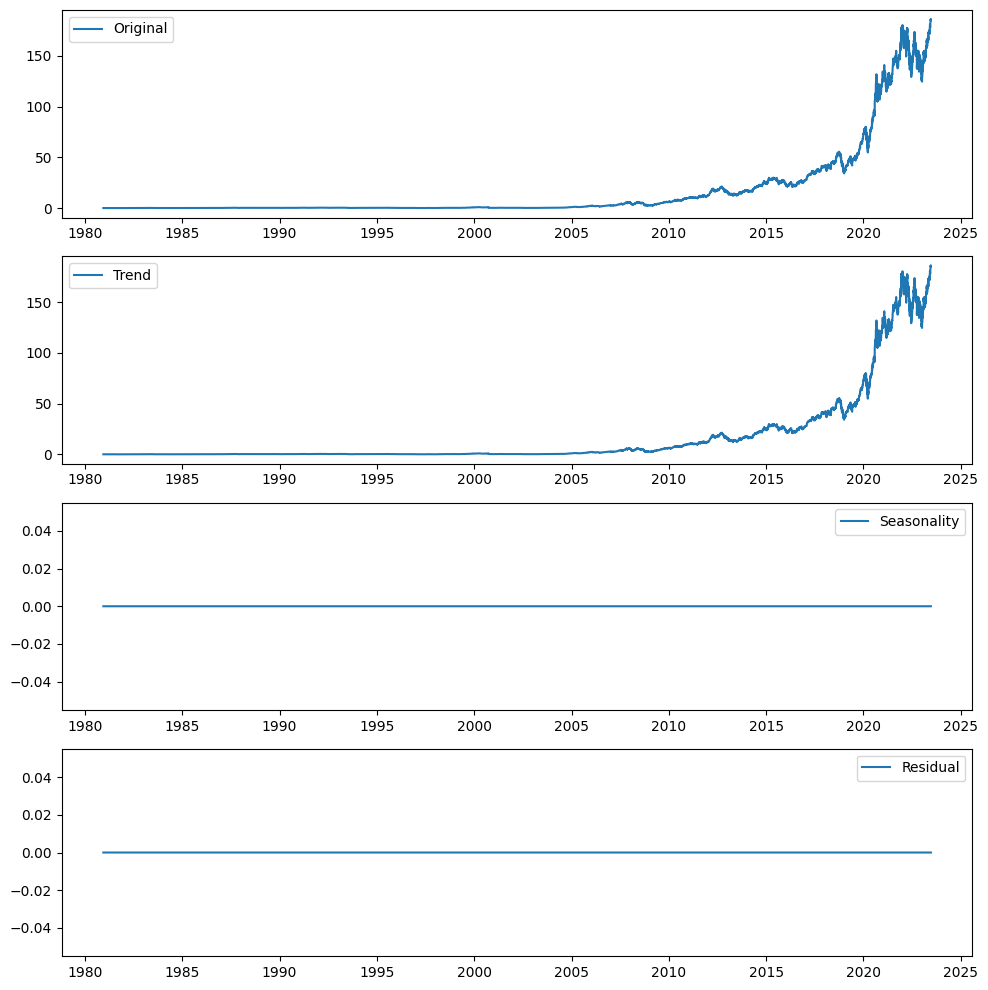

In [50]:
#@title Make the series stationary

#Plot the original series
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

# Plot the decomposed components
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(dataset, label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

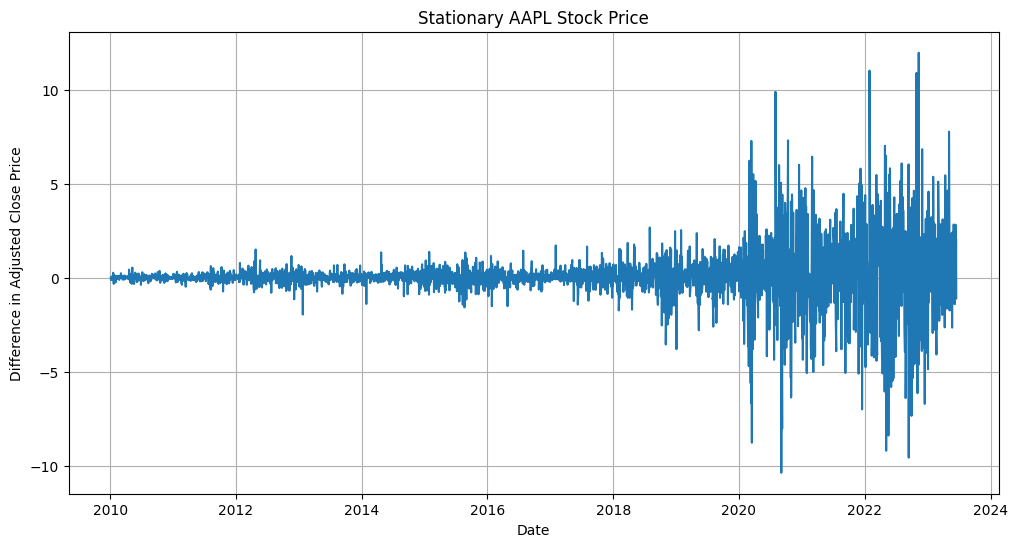

In [51]:
# Apply differencing to make the time series stationary
stationary_data = data.diff().dropna()

# Plot the stationary time series
plt.figure(figsize=(12, 6))
plt.plot(stationary_data)
plt.title('Stationary AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Difference in Adjusted Close Price')
plt.grid(True)
plt.show()

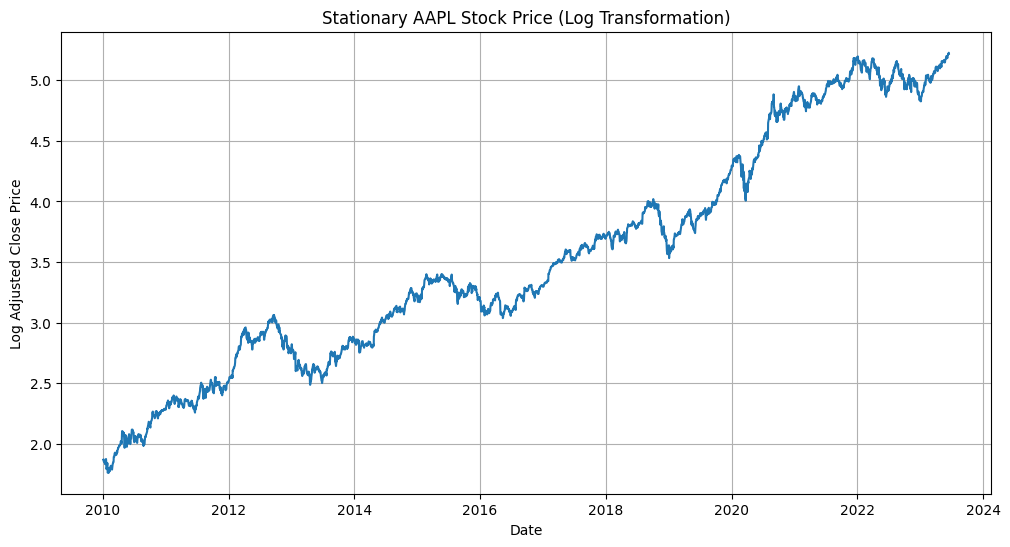

In [52]:
# Apply logarithmic transformation to make the time series stationary
log_data = np.log(data)

# Plot the stationary time series
plt.figure(figsize=(12, 6))
plt.plot(log_data)
plt.title('Stationary AAPL Stock Price (Log Transformation)')
plt.xlabel('Date')
plt.ylabel('Log Adjusted Close Price')
plt.grid(True)
plt.show()

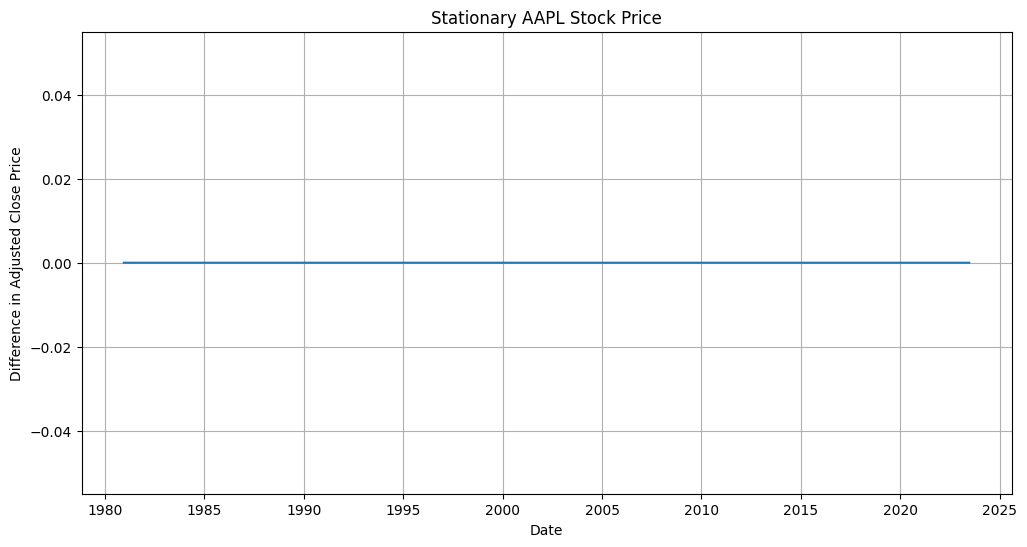

In [53]:
# Apply differencing to make the residual series stationary
stationary_data = residuals.diff().dropna()

# Plot the stationary time series
plt.figure(figsize=(12, 6))
plt.plot(stationary_data)
plt.title('Stationary AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Difference in Adjusted Close Price')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


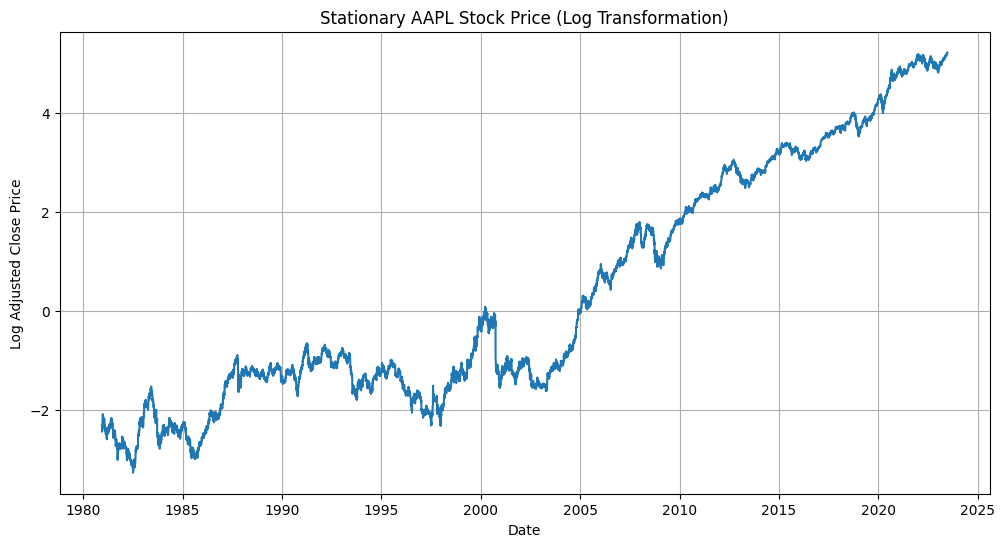

In [54]:
# Apply logarithmic transformation to make the time series stationary
# Seasonal decomposition of time series
decomposition = sm.tsa.seasonal_decompose(dataset, model='additive', period=1)
trend = decomposition.trend
seasonality = decomposition.seasonal
residual =decomposition.resid

log_data = np.log(residual)
dataset.index = pd.to_datetime(dataset.index)
log_data = np.log(dataset)
# Plot the stationary time series
plt.figure(figsize=(12, 6))
plt.plot(log_data)
plt.title('Stationary AAPL Stock Price (Log Transformation)')
plt.xlabel('Date')
plt.ylabel('Log Adjusted Close Price')
plt.grid(True)
plt.show()


**Task 5: Test for Normality**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test p-value (Original Series): 0.0


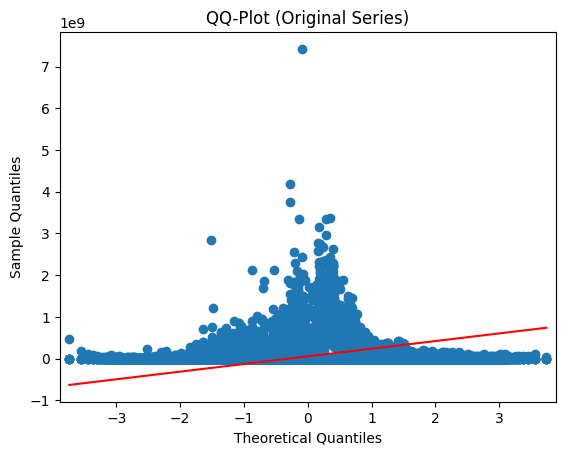

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Shapiro-Wilk test p-value (Transformed Series): 1.0


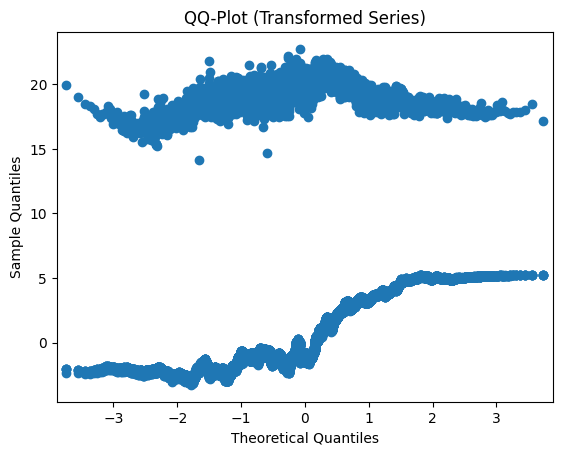

In [73]:
# Shapiro-Wilk test for normality
_, p_value = stats.shapiro(dataset)
print("Shapiro-Wilk test p-value (Original Series):", p_value)

# QQ-plot for the original series
sm.qqplot(dataset, line='s')
plt.title('QQ-Plot (Original Series)')
plt.show()

# Transformed series (e.g., logarithmic transformation)
transformed_series = np.log(dataset)

# Shapiro-Wilk test for normality on transformed series
_, p_value_transformed = stats.shapiro(transformed_series)
print("Shapiro-Wilk test p-value (Transformed Series):", p_value_transformed)

# QQ-plot for the transformed series
sm.qqplot(transformed_series, line='s')
plt.title('QQ-Plot (Transformed Series)')
plt.show()

**Task 6:  Test for Homoscedasticity and Apply Box-Cox Transformation**

White's Test:
P-value: 0.0


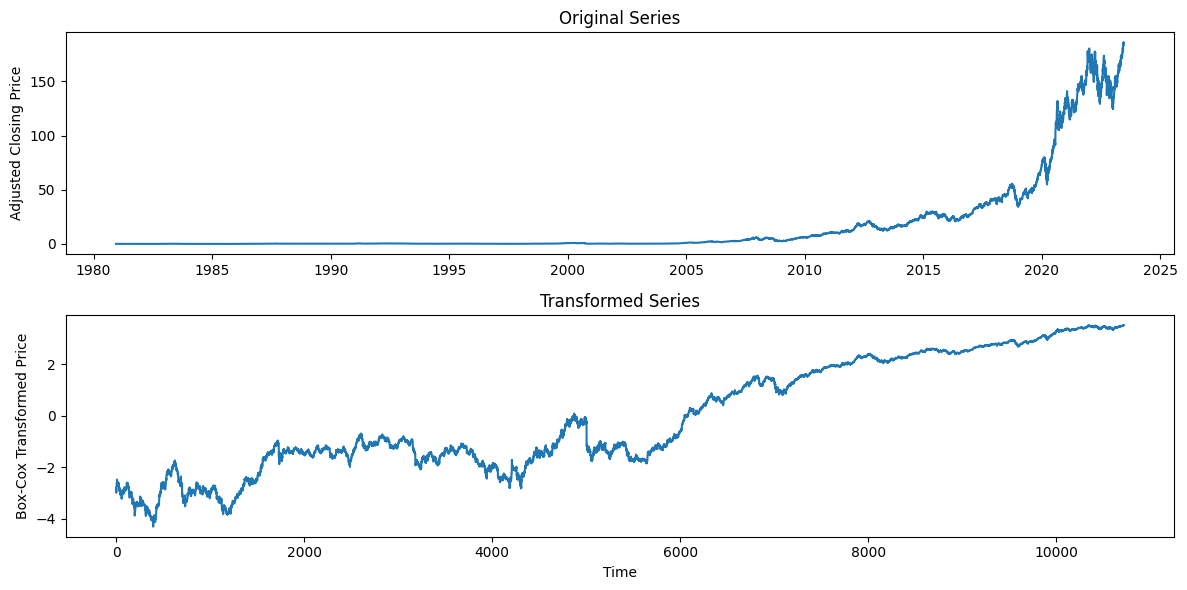

In [74]:

# Select the adjusted closing price column
adj_close = dataset['Adj Close']

# Add a constant term as exogenous variable
exog = sm.add_constant(adj_close)

# Perform the White's test for homoscedasticity
_, p_value, _, _ = sm.stats.diagnostic.het_white(adj_close, exog)
print("White's Test:")
print(f"P-value: {p_value}")

# Apply Box-Cox transformation to normalize the data and stabilize variance
transformed, lambda_val = stats.boxcox(adj_close)

# Visualize the original and transformed series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(adj_close)
plt.title("Original Series")
plt.ylabel("Adjusted Closing Price")

plt.subplot(2, 1, 2)
plt.plot(transformed)
plt.title("Transformed Series")
plt.ylabel("Box-Cox Transformed Price")
plt.xlabel("Time")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Mean Squared Error: 0.0003464615622364757
Mean Absolute Error: 0.013003541938323385


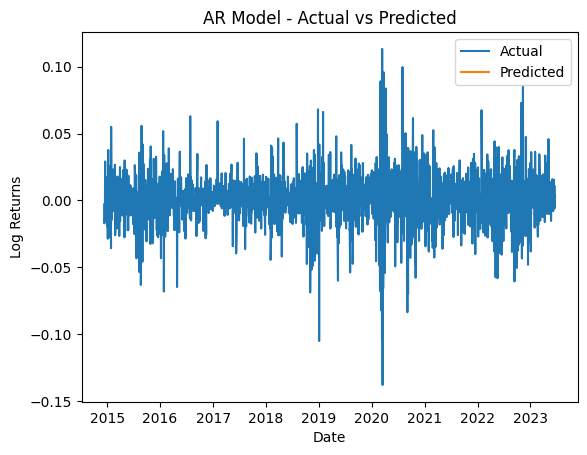

In [85]:
# @title TASK 7: Fit a Simple Autoregressive Model

from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute the log returns of the 'Close' prices
log_returns = np.log(dataset['Close']).diff().dropna()

# Split the series into training and testing sets
train_size = int(len(log_returns) * 0.8)
train, test = log_returns[:train_size], log_returns[train_size:]

# Determine the order of the AR model
order = 1

# Fit the AR model
model = AutoReg(train, lags=order)
model_fit = model.fit()

# Get the lagged values from the training set
train_lagged = train[-order:]

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, index=test.index, columns=['Predictions'])

# Compute the mean squared error
mse = mean_squared_error(test, predictions)

# Compute the mean absolute error
mae = mean_absolute_error(test, predictions)

# Print the performance metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Plot the actual vs predicted values
plt.plot(test, label='Actual')
plt.plot(predictions_df, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('AR Model - Actual vs Predicted')
plt.legend()
plt.show()


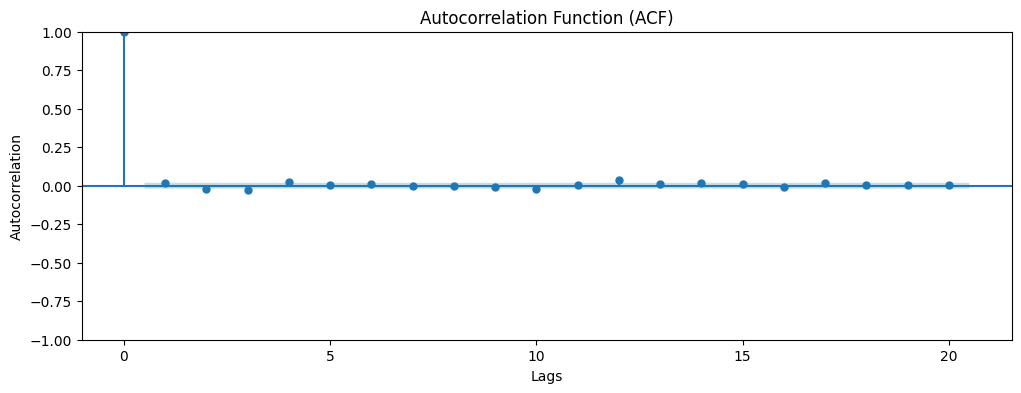

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


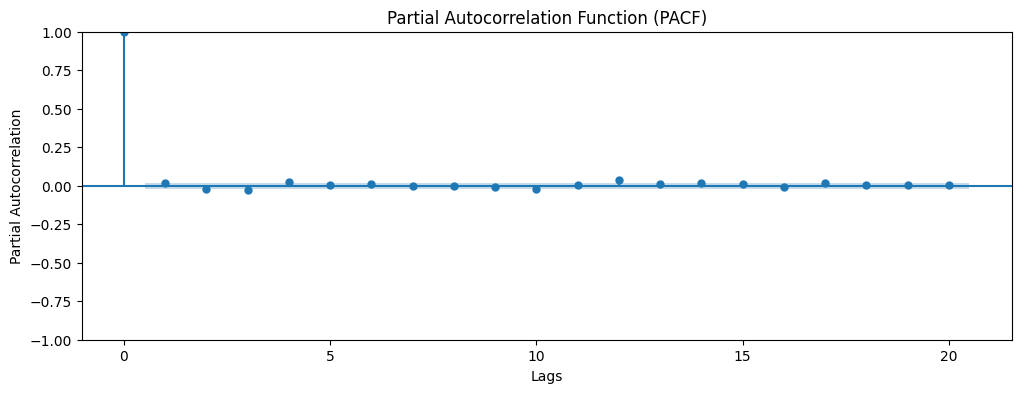

In [86]:
# @title TASK 8:Test for Autocorrelation and Plot ACF/PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute the log returns of the 'Close' prices
log_returns = np.log(dataset['Close']).diff().dropna()

# Plot the ACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(log_returns, lags=20, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot the PACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(log_returns, lags=20, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()
